# TMDB Movies Data Analysis

In this notebook, I will try to clean the movies data that I got from TMDB web scraping using scrapy. The data is taken from https://www.themoviedb.org/movie. For more info about how i did the web scraping, go to this github page - https://github.com/Ndhel97/TMDB_webscraping. 

In [1]:
import json
import pandas as pd
  
# Opening JSON file
f = open('tmdb_links.json', 'r')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [2]:
list(df.columns.values)

['title',
 'link',
 'release',
 'runtime',
 'score',
 'overview',
 'poster',
 'genre.genre1',
 'genre.genre2',
 'genre.genre3',
 'genre.genre4',
 'genre.genre5',
 'people.Director',
 'people.null',
 'people.Director, Screenplay, Story',
 'people.Screenplay',
 'people.Writer',
 'people.Story',
 'people.Screenplay, Story',
 'people.Director, Writer',
 'people.Novel',
 'people.Characters',
 'people.Director, Screenplay',
 'people.Director, Story',
 'people.Novel, Screenplay',
 'people.Story, Writer',
 'people.Director, Story, Writer',
 'people.Characters, Screenplay, Story',
 'people.Director, Screenplay, Writer',
 'people.Author',
 'people.Characters, Writer',
 'people.Author, Screenplay',
 'people.Screenplay, Writer',
 'people.Characters, Director',
 'people.Screenplay, Story, Writer',
 'people.Characters, Story',
 'people.Characters, Screenplay',
 'people.Characters, Director, Writer',
 'people.Novel, Story',
 'people.Author, Characters',
 'people.Characters, Director, Story',
 'people

In [3]:
# Deletes unimportant columns. I think i just need info about directors and writers only in the people parts.
for col in df.columns[12:]:
    if ('Writer') in col:
        continue
    elif ('Director') in col:
        continue
    elif 'person' not in col:
        del df[col]
df

,title,link,release,runtime,score,overview,poster,genre.genre1,genre.genre2,genre.genre3,...,"people.Author, Writer","people.Director, Teleplay","people.Novel, Writer","people.Author, Director, Screenplay","people.Teleplay, Writer","people.Author, Director, Story","people.Director, Screenplay, Story, Writer","people.Characters, Director, Screenplay, Story","people.Characters, Screenplay, Writer","people.Novel, Story, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,"[01/06/2021, (ID)]",1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Space Sweepers,/movie/581389,"[02/05/2021, (US)]",2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,"[02/12/2021, (CN)]",1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,"[03/24/2021, (ID)]",1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,"[04/14/2021, (ID)]",1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,"[01/15/2021, (US)]",1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,"[03/18/2021, (ID)]",4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,"[03/31/2021, (ID)]",1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,Nobody,/movie/615457-nobody,"[04/28/2021, (ID)]",1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Joins the columns that contain director into director only column and writer to writer only column. But, if the column contains both director and writer, the column will get into director, writer column
for col in df.columns[12:]:
    if 'Director' in col and 'Writer' in col :
        df['people.Director, Writer'] = df['people.Director, Writer'].fillna(df[col])
    elif 'Director' in col:
        df['people.Director'] = df['people.Director'].fillna(df[col])
    elif ('Writer') in col:
        df['people.Writer'] = df['people.Writer'].fillna(df[col])

In [5]:
# Deletes all other columns except 'director', 'writer', and 'director, writer' columns.
for col in df.columns[12:]:
    if (col == 'people.Director') or (col == 'people.Writer') or (col == 'people.Director, Writer'):
        continue
    else:
        del df[col]

df

,title,link,release,runtime,score,overview,poster,genre.genre1,genre.genre2,genre.genre3,genre.genre4,genre.genre5,people.Director,people.Writer,"people.Director, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,"[01/06/2021, (ID)]",1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN
1,Space Sweepers,/movie/581389,"[02/05/2021, (US)]",2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,"[02/12/2021, (CN)]",1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,"[03/24/2021, (ID)]",1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,"[04/14/2021, (ID)]",1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,"[01/15/2021, (US)]",1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,"[03/18/2021, (ID)]",4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,"[03/31/2021, (ID)]",1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN
9996,Nobody,/movie/615457-nobody,"[04/28/2021, (ID)]",1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN


In [6]:
# Separate the release_date column into release_date and release_country columns 
df = df.join(pd.DataFrame(df['release'].to_list(), columns=['release_date', 'release_country']))
df = df.drop(['release'], axis = 1)

# Reorder the columns
df = df[['title', 'link', 'release_date', 'release_country', 'runtime', 'score', 'overview', 'poster', 'genre.genre1', 'genre.genre2', 'genre.genre3', 'genre.genre4', 'genre.genre5', 'people.Director', 'people.Writer', 'people.Director, Writer']]
df.columns = ['title', 'link', 'release_date', 'release_country', 'runtime', 'score', 'overview', 'poster', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'Director', 'Writer', 'Director, Writer']

df

,title,link,release_date,release_country,runtime,score,overview,poster,genre1,genre2,genre3,genre4,genre5,Director,Writer,"Director, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,01/06/2021,(ID),1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN
1,Space Sweepers,/movie/581389,02/05/2021,(US),2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,02/12/2021,(CN),1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,03/24/2021,(ID),1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,04/14/2021,(ID),1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,01/15/2021,(US),1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,03/18/2021,(ID),4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,03/31/2021,(ID),1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN
9996,Nobody,/movie/615457-nobody,04/28/2021,(ID),1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN


In [7]:
# Save dataframe into json file
df.to_json('tmdb_movies_data.json', orient='records', compression = 'infer')

## Notes
I have tried to webscrape TMDB vote count using Scrapy. Unfortunately, I failed. The reason was, the vote count data was placed inside a javascript code (using widget pop-up). So, the vote count data only available when I click the score. I need to learn more about Scrapy. But for now, I got the vote count data using TMDB API. In this section I will try to add the vote count column to the df.

In [8]:
# Export movie ids
df_links = df['link']
# Save dataframe into json file
df_links.to_json('tmdb_movies_id.json')

In [9]:
# Opening JSON file
f = open('tmdb_data_api.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df_api = pd.DataFrame.from_dict({(i): data[i] 
                                 for i in data.keys()},
                                orient='index')

In [10]:
df_api

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
635302,False,/3FVe3OAdgz060JaxIAaUl5lo6cx.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://kimetsu.com/anime/movie/mugenressyahen/,635302,tt11032374,ja,劇場版「鬼滅の刃」無限列車編,...,2020-10-16,444500000,117.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,"With your blade, bring an end to the nightmare.",Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,False,8.3,778
581389,False,/drulhSX7P5TQlEMQZ3JoXKSDEfz.jpg,None,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",https://www.netflix.com/title/81094067,581389,tt12838766,ko,승리호,...,2021-02-05,0,136.0,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,"2092, the space sweep begins!",Space Sweepers,False,7.2,523
663558,False,/y0SiXoTLQp93NbLQ4XhgVz18UAS.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",,663558,tt13269670,zh,新神榜：哪吒重生,...,2021-02-06,0,116.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,,New Gods: Nezha Reborn,False,8.8,117
399566-godzilla-vs-kong,False,/inJjDhCjfhh3RtrJWBmmDqeuSYC.jpg,"{'id': 535313, 'name': 'Godzilla Collection', ...",160000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.godzillavskong.net/,399566,tt5034838,en,Godzilla vs. Kong,...,2021-03-24,406575844,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,False,8.2,5202
460465-mortal-kombat,False,/9yBVqNruk6Ykrwc32qrK2TIE5xw.jpg,None,20000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.mortalkombatmovie.net,460465,tt0293429,en,Mortal Kombat,...,2021-04-07,50115000,110.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Get over here.,Mortal Kombat,False,7.8,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775996-outside-the-wire,False,/lOSdUkGQmbAl5JQ3QoHqBZUbZhC.jpg,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",https://www.netflix.com/title/81074110,775996,tt10451914,en,Outside the Wire,...,2021-01-15,0,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Defiant by design.,Outside the Wire,False,6.5,1039
791373-zack-snyder-s-justice-league,False,/pcDc2WJAYGJTTvRSEIpRZwM3Ola.jpg,None,70000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.hbomax.com/zacksnydersjusticeleague,791373,tt12361974,en,Zack Snyder's Justice League,...,2021-03-18,0,242.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Zack Snyder's Justice League,False,8.5,5273
632357-the-unholy,False,/zDq2pwPyt4xwSFHKUoNN2LohDWj.jpg,None,10000000,"[{'id': 27, 'name': 'Horror'}]",https://www.sonypictures.com/movies/theunholy,632357,tt9419056,en,The Unholy,...,2021-03-31,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Be careful who you pray to.,The Unholy,False,5.7,65
615457-nobody,False,/6zbKgwgaaCyyBXE4Sun4oWQfQmi.jpg,None,17000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.nobody.movie,615457,tt7888964,en,Nobody,...,2021-03-26,35731879,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Never underestimate a nobody.,Nobody,False,8.4,1091


In [11]:
df_api = df_api.reset_index() # create a new index
df_api['index'] = '/movie/' + df_api['index'] # format so the movie id can be equal with link column
df_api.rename(columns = {'index':'link'}, inplace = True)
df_api

,link,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,/movie/635302,False,/3FVe3OAdgz060JaxIAaUl5lo6cx.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://kimetsu.com/anime/movie/mugenressyahen/,635302,tt11032374,ja,...,2020-10-16,444500000,117.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,"With your blade, bring an end to the nightmare.",Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,False,8.3,778
1,/movie/581389,False,/drulhSX7P5TQlEMQZ3JoXKSDEfz.jpg,None,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",https://www.netflix.com/title/81094067,581389,tt12838766,ko,...,2021-02-05,0,136.0,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,"2092, the space sweep begins!",Space Sweepers,False,7.2,523
2,/movie/663558,False,/y0SiXoTLQp93NbLQ4XhgVz18UAS.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",,663558,tt13269670,zh,...,2021-02-06,0,116.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,,New Gods: Nezha Reborn,False,8.8,117
3,/movie/399566-godzilla-vs-kong,False,/inJjDhCjfhh3RtrJWBmmDqeuSYC.jpg,"{'id': 535313, 'name': 'Godzilla Collection', ...",160000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.godzillavskong.net/,399566,tt5034838,en,...,2021-03-24,406575844,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,False,8.2,5202
4,/movie/460465-mortal-kombat,False,/9yBVqNruk6Ykrwc32qrK2TIE5xw.jpg,None,20000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.mortalkombatmovie.net,460465,tt0293429,en,...,2021-04-07,50115000,110.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Get over here.,Mortal Kombat,False,7.8,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,/movie/775996-outside-the-wire,False,/lOSdUkGQmbAl5JQ3QoHqBZUbZhC.jpg,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",https://www.netflix.com/title/81074110,775996,tt10451914,en,...,2021-01-15,0,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Defiant by design.,Outside the Wire,False,6.5,1039
9994,/movie/791373-zack-snyder-s-justice-league,False,/pcDc2WJAYGJTTvRSEIpRZwM3Ola.jpg,None,70000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.hbomax.com/zacksnydersjusticeleague,791373,tt12361974,en,...,2021-03-18,0,242.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Zack Snyder's Justice League,False,8.5,5273
9995,/movie/632357-the-unholy,False,/zDq2pwPyt4xwSFHKUoNN2LohDWj.jpg,None,10000000,"[{'id': 27, 'name': 'Horror'}]",https://www.sonypictures.com/movies/theunholy,632357,tt9419056,en,...,2021-03-31,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Be careful who you pray to.,The Unholy,False,5.7,65
9996,/movie/615457-nobody,False,/6zbKgwgaaCyyBXE4Sun4oWQfQmi.jpg,None,17000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.nobody.movie,615457,tt7888964,en,...,2021-03-26,35731879,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Never underestimate a nobody.,Nobody,False,8.4,1091


In [12]:
df = pd.merge(df, df_api[['link','vote_count']],on='link', how='left') # Merge the vote count column into df based on the link column
df

,title,link,release_date,release_country,runtime,score,overview,poster,genre1,genre2,genre3,genre4,genre5,Director,Writer,"Director, Writer",vote_count
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,01/06/2021,(ID),1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN,778
1,Space Sweepers,/movie/581389,02/05/2021,(US),2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN,523
2,New Gods: Nezha Reborn,/movie/663558,02/12/2021,(CN),1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN,117
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,03/24/2021,(ID),1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN,5202
4,Mortal Kombat,/movie/460465-mortal-kombat,04/14/2021,(ID),1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,01/15/2021,(US),1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN,1039
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,03/18/2021,(ID),4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN,5273
9995,The Unholy,/movie/632357-the-unholy,03/31/2021,(ID),1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN,65
9996,Nobody,/movie/615457-nobody,04/28/2021,(ID),1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN,1091


### More cleaning

In [13]:
# Change date format
df['release_date'] = pd.to_datetime(df['release_date'])

# Change score format to float
df['score'] = df['score'].astype(float)

In [14]:
import re

def format_runtime(run):
    """
    format runtime from ?h?m to minutes
    """
    if 'h' in run and 'm' in run:
        pro = re.split(r"h|m", run)
        return(int(pro[0]) * 60 + int(pro[1]))
    elif 'h' in run:
        return(int(run.split('h')[0])*60)
    else:
        return(int(run.split('m')[0])) 
    
df['runtime'] = df['runtime'].map(lambda a:format_runtime(a) if a != "null" else None)
    
# df['runtime'] = format_runtime(df['runtime'])

In [15]:
df

,title,link,release_date,release_country,runtime,score,overview,poster,genre1,genre2,genre3,genre4,genre5,Director,Writer,"Director, Writer",vote_count
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,2021-01-06,(ID),117.0,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN,778
1,Space Sweepers,/movie/581389,2021-02-05,(US),136.0,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN,523
2,New Gods: Nezha Reborn,/movie/663558,2021-02-12,(CN),116.0,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN,117
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,2021-03-24,(ID),113.0,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN,5202
4,Mortal Kombat,/movie/460465-mortal-kombat,2021-04-14,(ID),110.0,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,2021-01-15,(US),116.0,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN,1039
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,2021-03-18,(ID),242.0,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN,5273
9995,The Unholy,/movie/632357-the-unholy,2021-03-31,(ID),99.0,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN,65
9996,Nobody,/movie/615457-nobody,2021-04-28,(ID),92.0,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN,1091


# Movie Data Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, 'Drama'),
 Text(1, 0, 'Comedy'),
 Text(2, 0, 'Action'),
 Text(3, 0, 'Horror'),
 Text(4, 0, 'Animation'),
 Text(5, 0, 'Adventure'),
 Text(6, 0, 'Thriller'),
 Text(7, 0, 'Crime'),
 Text(8, 0, 'Science Fiction'),
 Text(9, 0, 'Fantasy'),
 Text(10, 0, 'Documentary'),
 Text(11, 0, 'Family'),
 Text(12, 0, 'Romance'),
 Text(13, 0, 'Music'),
 Text(14, 0, 'Mystery'),
 Text(15, 0, 'War'),
 Text(16, 0, 'Western'),
 Text(17, 0, 'History'),
 Text(18, 0, 'TV Movie')]

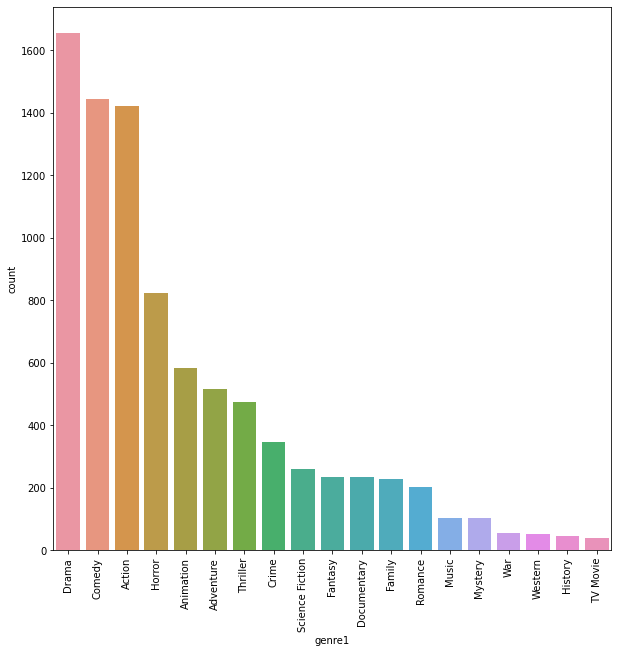

In [17]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="genre1", data=df, order = df['genre1'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

On the above plot, I tried to plot how many movies of each genre based on genre1 column. However, each movies can contain maximum of 5 different genres. In the next part, I will try to group based on each genre by combining all of the genre columns (not only genre1). 

In [18]:
# List unique categories with assumption that genre1 contains all of the unique genre possible
list(df['genre1'].unique())

['Animation',
 'Drama',
 'Science Fiction',
 'Fantasy',
 'Thriller',
 'Crime',
 'Comedy',
 'Action',
 None,
 'Adventure',
 'Romance',
 'Documentary',
 'Family',
 'Horror',
 'History',
 'War',
 'TV Movie',
 'Mystery',
 'Western',
 'Music']

In [19]:
# Make a new df of genres
df_genre = pd.DataFrame()
df_genre['genre1'] = df['genre1']
df_genre['genre2'] = df['genre2']
df_genre['genre3'] = df['genre3']
df_genre['genre4'] = df['genre4']
df_genre['genre5'] = df['genre5']
df_genre

,genre1,genre2,genre3,genre4,genre5
0,Animation,Action,Adventure,Fantasy,Drama
1,Drama,Fantasy,Science Fiction,None,None
2,Animation,Action,Fantasy,None,None
3,Science Fiction,Action,Drama,None,None
4,Fantasy,Action,Adventure,Science Fiction,Thriller
...,...,...,...,...,...
9993,Thriller,Action,Science Fiction,None,None
9994,Action,Adventure,Fantasy,Science Fiction,None
9995,Horror,None,None,None,None
9996,Action,Thriller,Crime,None,None


In [20]:
# Apply one hot encoding for each genre columns in a new df
df_gen1 = pd.get_dummies(df_genre['genre1'], columns=['Animation','Drama','Science Fiction','Fantasy','Thriller','Crime','Comedy','Action','Adventure','Romance','Documentary','Family','Horror','History','War','TV Movie','Mystery','Western','Music'])
df_gen2 = pd.get_dummies(df_genre['genre2'], columns=['Animation','Drama','Science Fiction','Fantasy','Thriller','Crime','Comedy','Action','Adventure','Romance','Documentary','Family','Horror','History','War','TV Movie','Mystery','Western','Music'])
df_gen3 = pd.get_dummies(df_genre['genre3'], columns=['Animation','Drama','Science Fiction','Fantasy','Thriller','Crime','Comedy','Action','Adventure','Romance','Documentary','Family','Horror','History','War','TV Movie','Mystery','Western','Music'])
df_gen4 = pd.get_dummies(df_genre['genre4'], columns=['Animation','Drama','Science Fiction','Fantasy','Thriller','Crime','Comedy','Action','Adventure','Romance','Documentary','Family','Horror','History','War','TV Movie','Mystery','Western','Music'])
df_gen5 = pd.get_dummies(df_genre['genre5'], columns=['Animation','Drama','Science Fiction','Fantasy','Thriller','Crime','Comedy','Action','Adventure','Romance','Documentary','Family','Horror','History','War','TV Movie','Mystery','Western','Music'])
df_gen4['Documentary'] = 0 # In the column genre4 ad genre5, there is no documentary genre, 
df_gen5['Documentary'] = 0 # so when I implemented one hot encoding, there was no documentary column in df_genre4 and df_genre5
                           # resulting the df_gen (df which is the combined values of each genre) documentary column became NaN value.
                           # To fix this, I assigned both documentary columns in df_gen4 and df_gen5 to 0. 

# Combine df so each movies can have more than one genre        
df_gen = df_gen1 + df_gen2 + df_gen3 + df_gen4 + df_gen5

In [21]:
df_gen

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9994,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9996,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
df_gen = df_gen.T # Invert the index and the columns
df_gen

,0,1,2,3,4,5,6,7,8,9,...,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997
Action,1,0,1,1,1,1,0,0,1,1,...,0,0,1,0,1,1,1,0,1,0
Adventure,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
Animation,1,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Crime,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,1,1,0,1,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
Family,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Fantasy,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
History,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_gen = df_gen.sum(axis=1) # sum the values of each rows
df_gen = df_gen.sort_values(ascending = False) # sort each rows

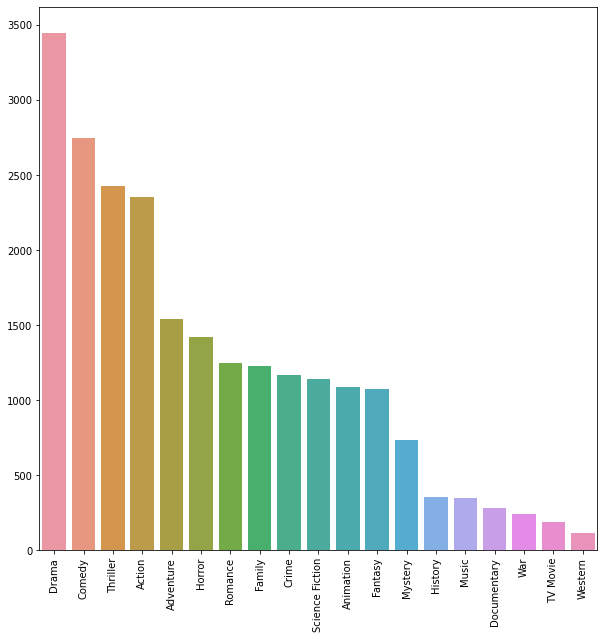

In [24]:
values = df_gen.values.flatten()

plt.figure(figsize=(10, 10))
ax = sns.barplot(x = df_gen.index,y=values)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Based on the above plot, we can see that almost 35% of the movies are Drama. Don't forget that each categories is for 10 thousand movies, because each movies can contain more than one genres. To make it simple, further section will apply an assumption that genre1 is the main genre of the movies.

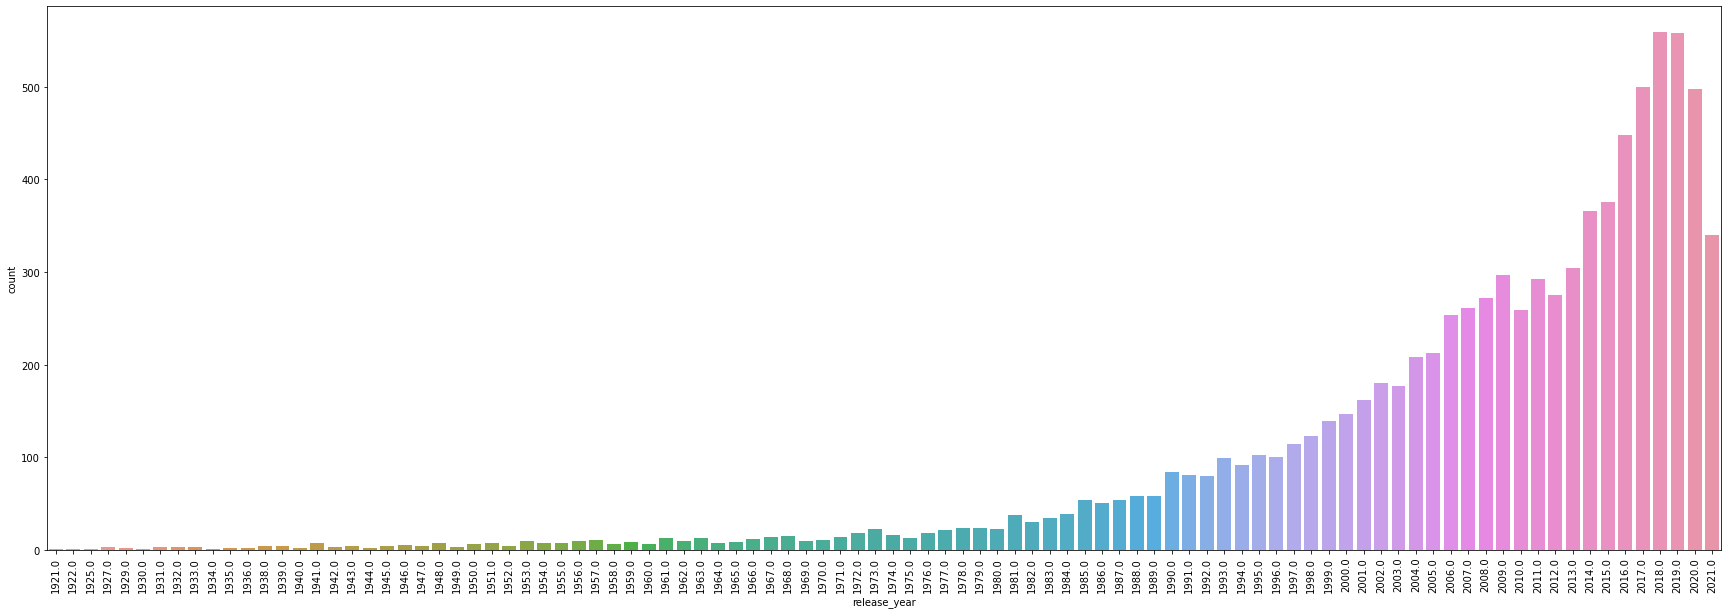

In [25]:
df['release_date'] = df['release_date'].astype("datetime64")
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

plt.figure(figsize=(30, 10))
ax = sns.countplot(x=df['release_year'])
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [26]:
df_genre_year = pd.DataFrame()
df_genre_year['year'] = df['release_year']
df_genre_year['genre'] = df['genre1']
df_genre_year = df_genre_year[df_genre_year['year'] >= 2000]
genre_by_year = df_genre_year.groupby(['year', 'genre']).size()

In [27]:
genre_by_year

year    genre          
2000.0  Action             20
        Adventure          10
        Animation          10
        Comedy             34
        Crime               6
                           ..
2021.0  Romance            10
        Science Fiction    12
        TV Movie            1
        Thriller           20
        War                 2
Length: 385, dtype: int64

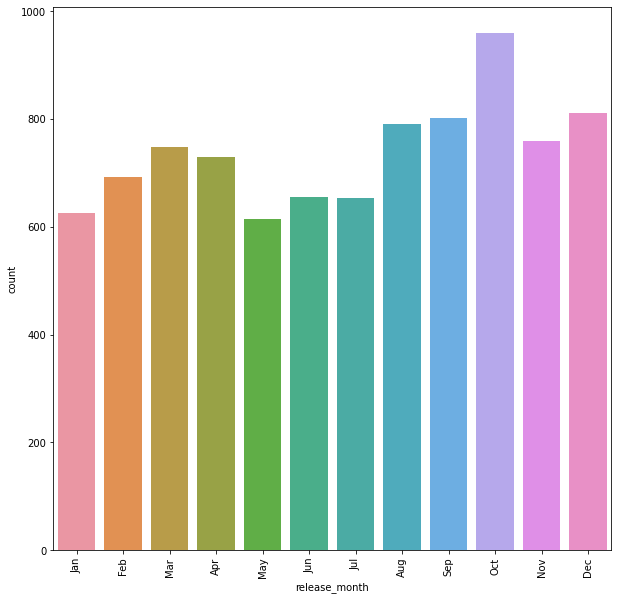

In [28]:
df['release_month'] = df['release_date'].dt.strftime('%b')
sorted_months = df['release_month']
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=df['release_month'], order=Months)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

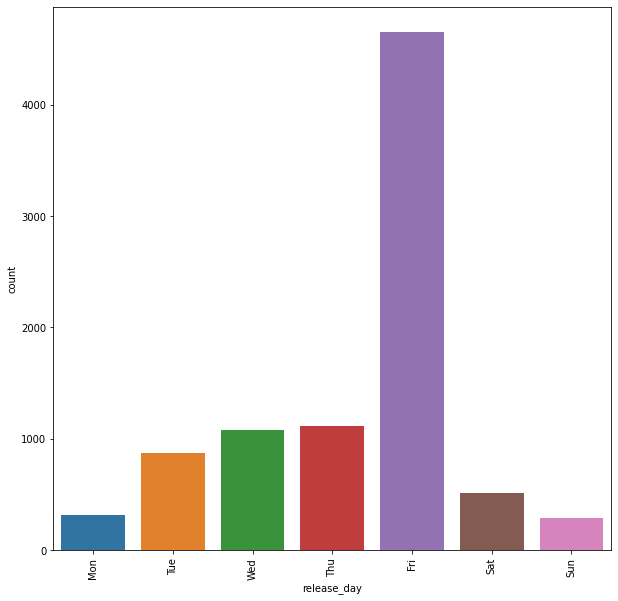

In [29]:
df['release_day'] = df['release_date'].dt.strftime('%a')
sorted_days = df['release_day']
Days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=df['release_day'], order=Days)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

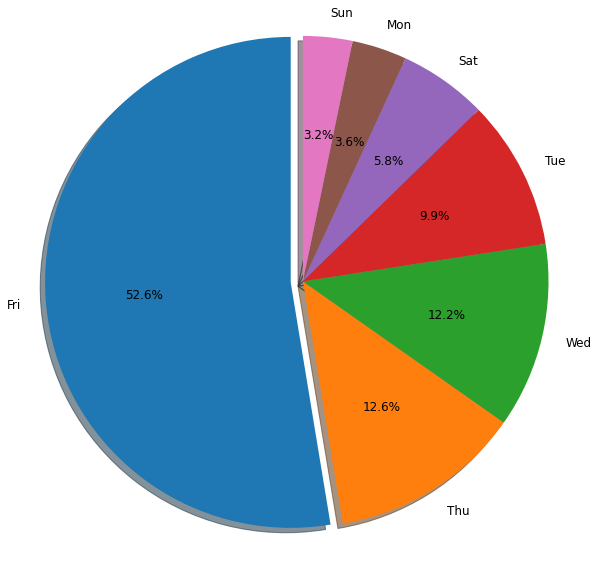

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(df['release_day'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, labels=df['release_day'].value_counts().index, 
        explode=[0.05,0,0,0,0,0,0], textprops={'fontsize': 12})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [31]:
df_votes = pd.DataFrame()
df_votes['genre'] = df['genre1']
df_votes['vote_count'] = df['vote_count']
votes_by_genre = df_votes.groupby(['genre']).sum(['vote_count']).sort_values(['vote_count'])

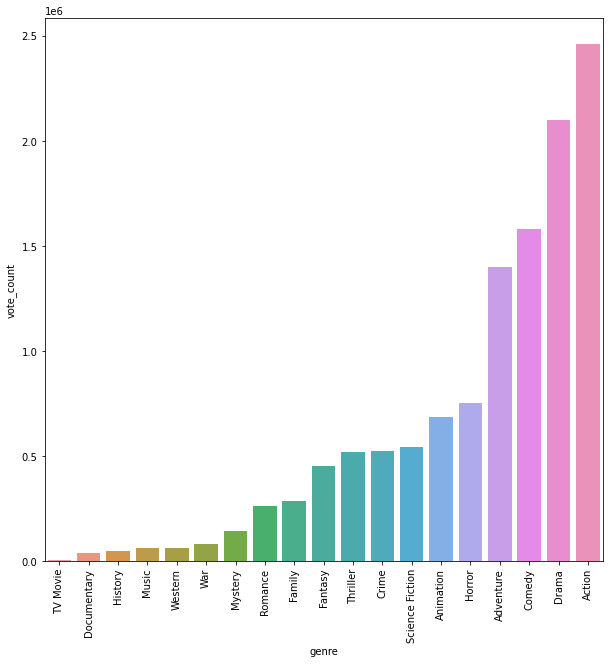

In [32]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(y=votes_by_genre['vote_count'], x=votes_by_genre.index)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [33]:
votes_by_genre

,vote_count
genre,
TV Movie,7853
Documentary,41546
History,49027
Music,64815
Western,65127
War,82460
Mystery,142981
Romance,262842
Family,289011


# Movie Recommender System

In this section, I will make a simple movie recommender system based on https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system. 

### Demographic Filtering


In demographic filtering we only need the average score of each movies, then sort the scores and recommend the movies with the best average score. But we need to add weight scoring so the movie with more vote counts will be more considered to have higher rate score than movies with low vote counts. We will use weighted rating by IMDB.

WR = (vR/(v+m)) + (mC/(v+m))

where: 
v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

In [34]:
C = df['score'].mean()
C

62.08491698339668

We need to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [35]:
m = df['vote_count'].quantile(0.9)
m

3205.300000000001

In [36]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies

,title,link,release_date,release_country,runtime,score,overview,poster,genre1,genre2,genre3,genre4,genre5,Director,Writer,"Director, Writer",vote_count,release_year,release_month,release_day
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,2021-03-24,(ID),113.0,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN,5202,2021.0,Mar,Wed
9,Wonder Woman 1984,/movie/464052-wonder-woman-1984,2020-12-25,(US),151.0,67.0,A botched store robbery places Wonder Woman in...,/t/p/w300_and_h450_bestv2/8UlWHLMpgZm9bx6QYh0N...,Fantasy,Action,Adventure,None,None,Patty Jenkins,NaN,NaN,5022,2020.0,Dec,Fri
21,Avengers: Infinity War,/movie/299536-avengers-infinity-war,2018-04-27,(US),149.0,83.0,As the Avengers and their allies have continue...,/t/p/w300_and_h450_bestv2/7WsyChQLEftFiDOVTGkv...,Adventure,Action,Science Fiction,None,None,Joe Russo,NaN,NaN,21684,2018.0,Apr,Fri
23,Fast & Furious Presents: Hobbs & Shaw,/movie/384018-fast-furious-presents-hobbs-shaw,2019-08-02,(US),137.0,69.0,Ever since US Diplomatic Security Service Agen...,/t/p/w300_and_h450_bestv2/qRyy2UmjC5ur9bDi3kpN...,Action,Adventure,Comedy,None,None,David Leitch,NaN,NaN,4852,2019.0,Aug,Fri
25,Tenet,/movie/577922-tenet,2021-02-10,(ID),150.0,73.0,Armed with only one word - Tenet - and fightin...,/t/p/w300_and_h450_bestv2/k68nPLbIST6NP96JmTxm...,Action,Thriller,Science Fiction,None,None,NaN,NaN,Christopher Nolan,5155,2021.0,Feb,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,Joker,/movie/475557-joker,2019-10-02,(ID),122.0,82.0,"During the 1980s, a failed stand-up comedian i...",/t/p/w300_and_h450_bestv2/udDclJoHjfjb8Ekgsd4F...,Crime,Thriller,Drama,None,None,NaN,Scott Silver,Todd Phillips,17468,2019.0,Oct,Wed
9972,Bad Boys for Life,/movie/38700-bad-boys-for-life,2020-01-17,(US),124.0,72.0,Marcus and Mike are forced to confront new thr...,/t/p/w300_and_h450_bestv2/y95lQLnuNKdPAzw9F9Ab...,Thriller,Action,Crime,None,None,Adil El Arbi,NaN,NaN,6234,2020.0,Jan,Fri
9974,Birds of Prey (and the Fantabulous Emancipatio...,/movie/495764-birds-of-prey-and-the-fantabulou...,2020-02-07,(US),109.0,71.0,"Harley Quinn joins forces with a singer, an as...",/t/p/w300_and_h450_bestv2/h4VB6m0RwcicVEZvzftY...,Action,Crime,None,None,None,Cathy Yan,NaN,NaN,7424,2020.0,Feb,Fri
9986,Soul,/movie/508442-soul,2020-12-25,(TW),101.0,83.0,Joe Gardner is a middle school teacher with a ...,/t/p/w300_and_h450_bestv2/hm58Jw4Lw8OIeECIq5qy...,Family,Animation,Comedy,Drama,Music,Pete Docter,NaN,NaN,5882,2020.0,Dec,Fri


In [40]:
def weighted_rating(x, m=m, C=C):
    """
    Calculation based on the IMDB weighting score
    """
    v = x['vote_count']
    R = x['score']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [41]:
# Apply the weighting raing function to the movie in q_movies
q_movies['new_score'] = q_movies.apply(weighted_rating, axis=1)

In [44]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('new_score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'score', 'new_score']].head(20)

,title,vote_count,score,new_score
333,The Shawshank Redemption,18838,83.377116,80.281033
9571,The Dark Knight,24988,82.394781,80.085750
9478,Pulp Fiction,21011,81.966931,79.335322
447,Forrest Gump,20457,81.895918,79.212316
9622,Inception,28955,80.915470,79.038697
9463,Fight Club,21637,81.172387,78.709609
9538,The Godfather,14222,82.417516,78.677862
9819,Interstellar,25671,80.678404,78.614507
9703,The Lord of the Rings: The Return of the King,17555,81.462011,78.470272
9742,The Lord of the Rings: The Fellowship of the Ring,19025,80.840150,78.135906
